In [82]:
import torch
print(torch.__version__)

2.6.0+cu124


# Обучение нейронной сети

## Ирисы Фишера

### Набор данных

 Вы будете работать с известным набором данных для тестирования моделей, чтобы решить задачу классификации [«Ирисы Фишера»](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

 Набор состоит из информации о 150
 различных цветках ирисов, для каждого из которых известны следующие характеристики:

 1. Длина чашелистика (sepal length), см.
 1. Ширина чашелистика (sepal width), см.
 1. Длина лепестка (petal length), см.
 1. Ширина лепестка (petal width), см.

 Также для каждого из цветков известен один из трёх классов, которому он принадлежит:

 1. Ирис щетинистый (setosa).
 1. Ирис виргинский (virginica).
 1. Ирис разноцветный (versicolor).

 При решении задачи классификации, которая задаётся этим набором данных, нужно научиться по нескольким характеристикам цветка определять, к какому классу он принадлежит.

### Ирисы Фишера в Python

В Python ирисы Фишера доступны в библиотеке `sklearn`:

```
from sklearn import datasets

# в переменную будет сохранён объект «набор данных «Ирисы Фишера»
data = datasets.load_iris()  
```

Чтобы преобразовать набор данных к виду, в котором его будет удобно использовать при создании моделей в PyTorch, необходимо написать:


```
X = torch.tensor(data['data'])
y = torch.tensor(data['target'])
```

В результате в переменной $X$ будет находиться матрица размера $150 \times 4$, в которой каждая строчка соответствует конкретному цветку, а каждая из колонок — одной из его характеристик:

```
tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        ...
        [5.9000, 3.0000, 5.1000, 1.8000]], dtype=torch.float64)
```

В переменной $y$ будет находиться вектор размера $150$. На $i$-й позиции в векторе стоит значение класса для $i$-го цветка из матрицы $X$:


```
tensor([0, 0, 0, 0, ... 2, 2, 2, 2])
```



In [83]:
import sklearn
from sklearn import datasets

In [84]:
data = datasets.load_iris() 

In [85]:
X = torch.tensor(data['data'])
y = torch.tensor(data['target'])

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Что нужно сделать?

В рамках задания вам будет необходимо реализовать нейронную сеть и обучить её для решения задачи классификации цветков из набора данных «Ирисы Фишера».

#### Создание нейронной сети

В этом блокноте ниже уже есть заготовка для решения задания.

В переменную $X$ помещена матрица с характеристиками цветков из набора, в переменную $y$ помещены значения классов, которые необходимо научиться предсказывать.

Вам необходимо заполнить пропущенные места в коде, придумав архитектуру нейронной сети, которая сможет решить поставленную задачу, а также запустить обучение полученной модели. Пропуски, которые необходимо заполнить, помечены комментарием TODO.

In [87]:
from collections import OrderedDict
model = torch.nn.Sequential(
    OrderedDict([
        ("linear_1", torch.nn.Linear(4, 16)),
        ("activation_1", torch.nn.ReLU()),
        ("linear_2", torch.nn.Linear(16, 9)),
        ("activation_2", torch.nn.ReLU()),
        ("linear_3", torch.nn.Linear(9, 3)),
        ("log_softmax", torch.nn.LogSoftmax(dim=1)),
    ])
)
model = model.to(dtype=X.dtype)

In [88]:
model

Sequential(
  (linear_1): Linear(in_features=4, out_features=16, bias=True)
  (activation_1): ReLU()
  (linear_2): Linear(in_features=16, out_features=9, bias=True)
  (activation_2): ReLU()
  (linear_3): Linear(in_features=9, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

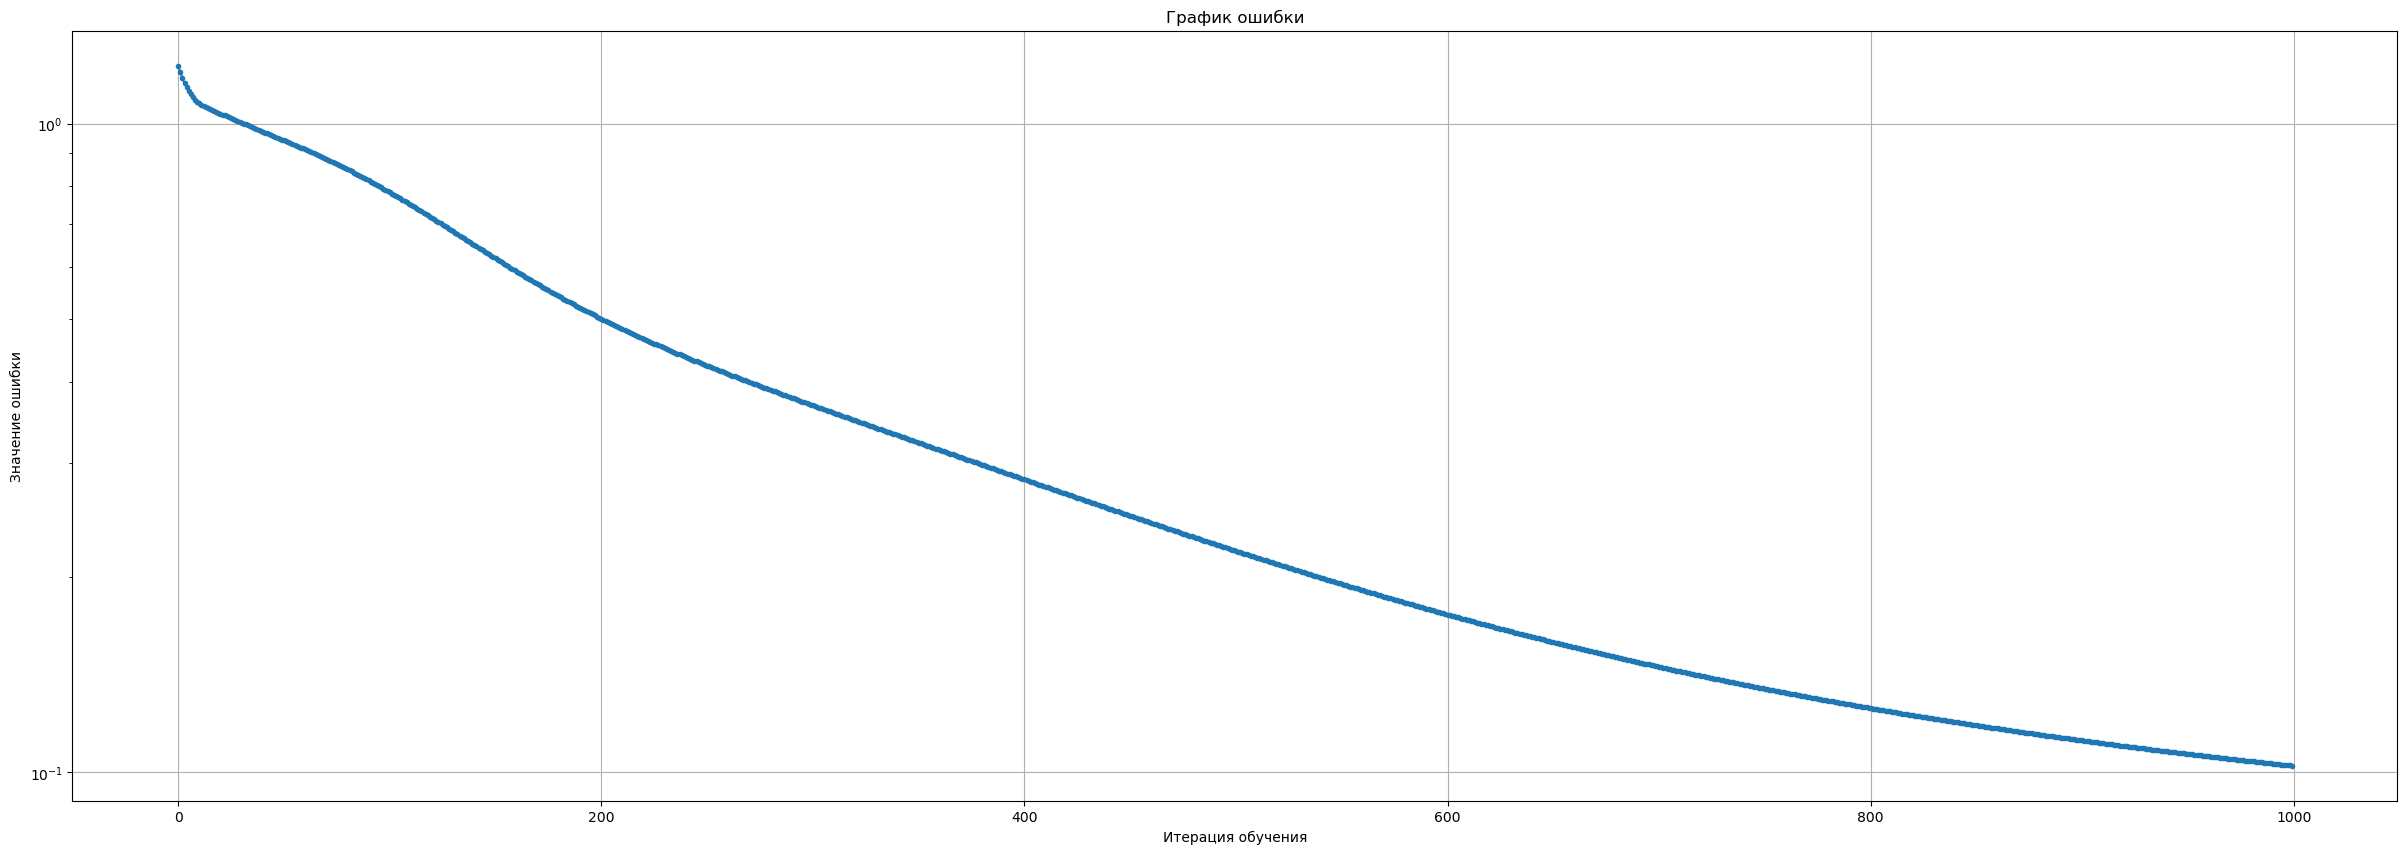

In [89]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

num_epochs = 1000

optimizer = torch.optim.SGD(
    model.parameters(),  
    lr=0.01,               
)

loss_fn = torch.nn.NLLLoss()

losses = []

test_accuracy_history = []

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad() 
    y_pred = model(X_train) 
    loss = loss_fn(y_pred, y_train.long())
    loss.backward() 
    optimizer.step()
    losses.append(loss.item())

    with torch.no_grad():
      test_preds = model.forward(X_test)
      accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
      test_accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.yscale("log")
        plt.grid()
        plt.show()

## Получение предсказания на тестовой выборке
В качестве ответа присвойте переменной y_pred список предсказанных классов для тестовыой выборки


In [90]:
log_probs = model(X_test)
pred_class_probs = log_probs.exp()
pred_class = torch.argmax(log_probs, dim=1)

#### Ответ на тестовой выборке

In [91]:
print(pred_class)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])


Посчитайте точность предсказаний, как долю верно предсказанных ответов

In [92]:
accuracy = (pred_class == y_test).float().mean().item()
print(f"Точность: {accuracy:.4f}")

Точность: 0.9667
